<a href="https://colab.research.google.com/github/tushar2k/Sem-V-labs/blob/master/DL-%20ECSE440L/DL_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set used to implement is amazon customer review data.

In [47]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras import layers
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
data = pd.read_csv('https://raw.githubusercontent.com/tushar2k/Sem-V-labs/master/DL-%20ECSE440L/data/Lab4%20data',sep='\t',names=['sentence','label'])

In [49]:
data

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [50]:
STOPWORDS = set(stopwords.words('english'))
def clean(text):
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
data['sentence'] = data['sentence'].apply(clean)
data['sentence']

0                  So way plug US unless I go converter.
1                            Good case, Excellent value.
2                                         Great jawbone.
3      Tied charger conversations lasting 45 minutes....
4                                         The mic great.
                             ...                        
995      The screen get smudged easily touches ear face.
996                What piece junk.. I lose calls phone.
997                         Item Does Not Match Picture.
998          The thing disappoint infra red port (irda).
999            You answer calls unit, never worked once!
Name: sentence, Length: 1000, dtype: object

In [51]:
from sklearn.model_selection import train_test_split
s_X_train,s_X_test,y_train,y_test= train_test_split(data['sentence'].values,data['label'].values,test_size=0.25)

In [52]:
vectorized=CountVectorizer()
vectorized.fit(s_X_train)
X_train=vectorized.transform(s_X_train)
X_test=vectorized.transform(s_X_test)
X_train

<750x1531 sparse matrix of type '<class 'numpy.int64'>'
	with 4370 stored elements in Compressed Sparse Row format>

In [53]:
x=3
acc=[]
his=[]
input_dim = X_train.shape[1]
while x<11:
    model = Sequential()
    model.add(layers.Dense(pow(2,x), input_dim=input_dim, activation='relu'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    his.append(model.fit(X_train,y_train,epochs=100,batch_size=10))
    acc.append(model.evaluate(X_test,y_test)[1])
    x+=1

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 8)                 12256     
Total params: 12,256
Trainable params: 12,256
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
75/75 [==============================] - 0s 1ms/step - loss: 3.5248 - accuracy: 0.1373
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 1.9320 - accuracy: 0.1627
Epoch 3/100
75/75 [==============================] - 0s 1ms/step - loss: 1.3137 - accuracy: 0.1640
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 1.0599 - accuracy: 0.1520
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 0.9242 - accuracy: 0.1907
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 0.8450 - accuracy: 0.1853
Epoch 7/100
75/75 [==============================

In [ ]:
# his[0].history['accuracy']

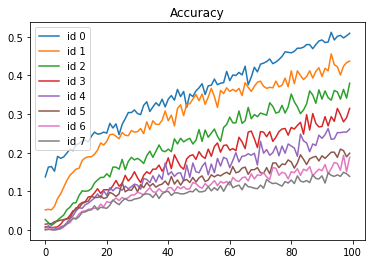

In [55]:
x=range(len(his[0].history['accuracy']))
x=np.array(x)
plt.title('Accuracy')
for i in range(len(his)):
    plt.plot(x,np.array(his[i].history['accuracy']).T,label = 'id %s'%i)
plt.legend()
plt.show()

In [56]:
model=Sequential()
input_dim = X_train.shape[1]
his1=[]
model.add(layers.Dense(32, input_dim=input_dim, activation='relu'))
x=2
while x<6:
    model.add(layers.Dense(32, input_dim=input_dim, activation='relu'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    his1.append(model.fit(X_train,y_train,epochs=100,batch_size=10))
    # acc.append(model.evaluate(X_test,y_test)[1])
    x+=1

Epoch 1/100
75/75 [==============================] - 0s 1ms/step - loss: 2.5558 - accuracy: 0.0000e+00
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 1.2635 - accuracy: 0.0013
Epoch 3/100
75/75 [==============================] - 0s 1ms/step - loss: 0.8622 - accuracy: 0.0000e+00
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.0000e+00
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.0000e+00
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 0.4128 - accuracy: 0.0000e+00
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.0000e+00
Epoch 8/100
75/75 [==============================] - 0s 1ms/step - loss: 0.2595 - accuracy: 0.0000e+00
Epoch 9/100
75/75 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.0000e+00
Epoch 10/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1

In [ ]:
# his1[3].history['accuracy']

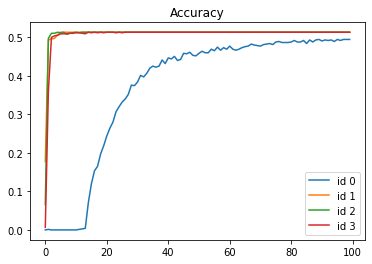

In [58]:
x=range(len(his1[3].history['accuracy']))
x=np.array(x)
plt.title('Accuracy')
for i in range(len(his1)):
    plt.plot(x,np.array(his1[i].history['accuracy']).T,label = 'id %s'%i)
plt.legend()
plt.show()